이름 : (박리나)        평가 날짜 : 2023-06-09

# Water Possibility(음수) 가능 여부를 판단하기
- 데이터 분석(EDA)
- 결측 데이터 처리
- 피처 엔지니어링
- 머신러닝, 모델 평가, 테스트
- 사용 학습기 : KNN, xgboost ML 모델을 만들고 성능 비교하기
- GridSearchCV : 최적의 하이퍼 파라미터를 찾을 때 사용함

In [149]:
# 필요한 라이브러리 임폴트
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error, classification_report

데이터 출처 : https://www.kaggle.com/datasets/adityakadiwal/water-potability

### 데이터 설명
1. ph: pH 1. 물(0~14).량
2. Hardness비누를 침전시키는 물의 용량(mg/L)L.
3. Solid총 용해 고형물(ppm)pm.
4. Chloramin클로라민의 양(ppm).ppm.
5. Sulfmg/L 단위로 용해된 황산염의 양.mg/L.
6. Conducti물의 전기 전도도(단위: μS/cm).μS/cm.
7. Organic_c유기 탄소의 양(ppm).in ppm.
8. Trihalomeμg/L 단위의 트리할로메탄 양.in μg/L.
9. Tu NTU 단위로 물의 발광 특성을 측정함.r in NTU.
10. Po물이 인간이 섭취하기에 안전한지 여부를 나타냄
    - 마실 수 있는 -1
    - 마실 수 없는 -0potable -0

사용할 데이터는 사람이 마실 수 잇는 물인지 아닌지를 판단하는 데이터 입니다.
- 독립변수(X) : ph ~ Turbidity
- 종속변수(y) : potability

## 1. Data Load(5점)

In [150]:
# ml_datas/water_potability.csv
water_df = pd.read_csv("ml_datas/water_potability.csv")

In [151]:
water_df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

## 2. 데이터 정보, 기술통계확인(5점)

In [152]:
water_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


- 기술통계 확인하기

In [153]:
water_df.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

## 3. 데이터 시각화(20점)

### 모든 컬럼들의 데이터 분포 확인

In [154]:
cols = water_df.columns

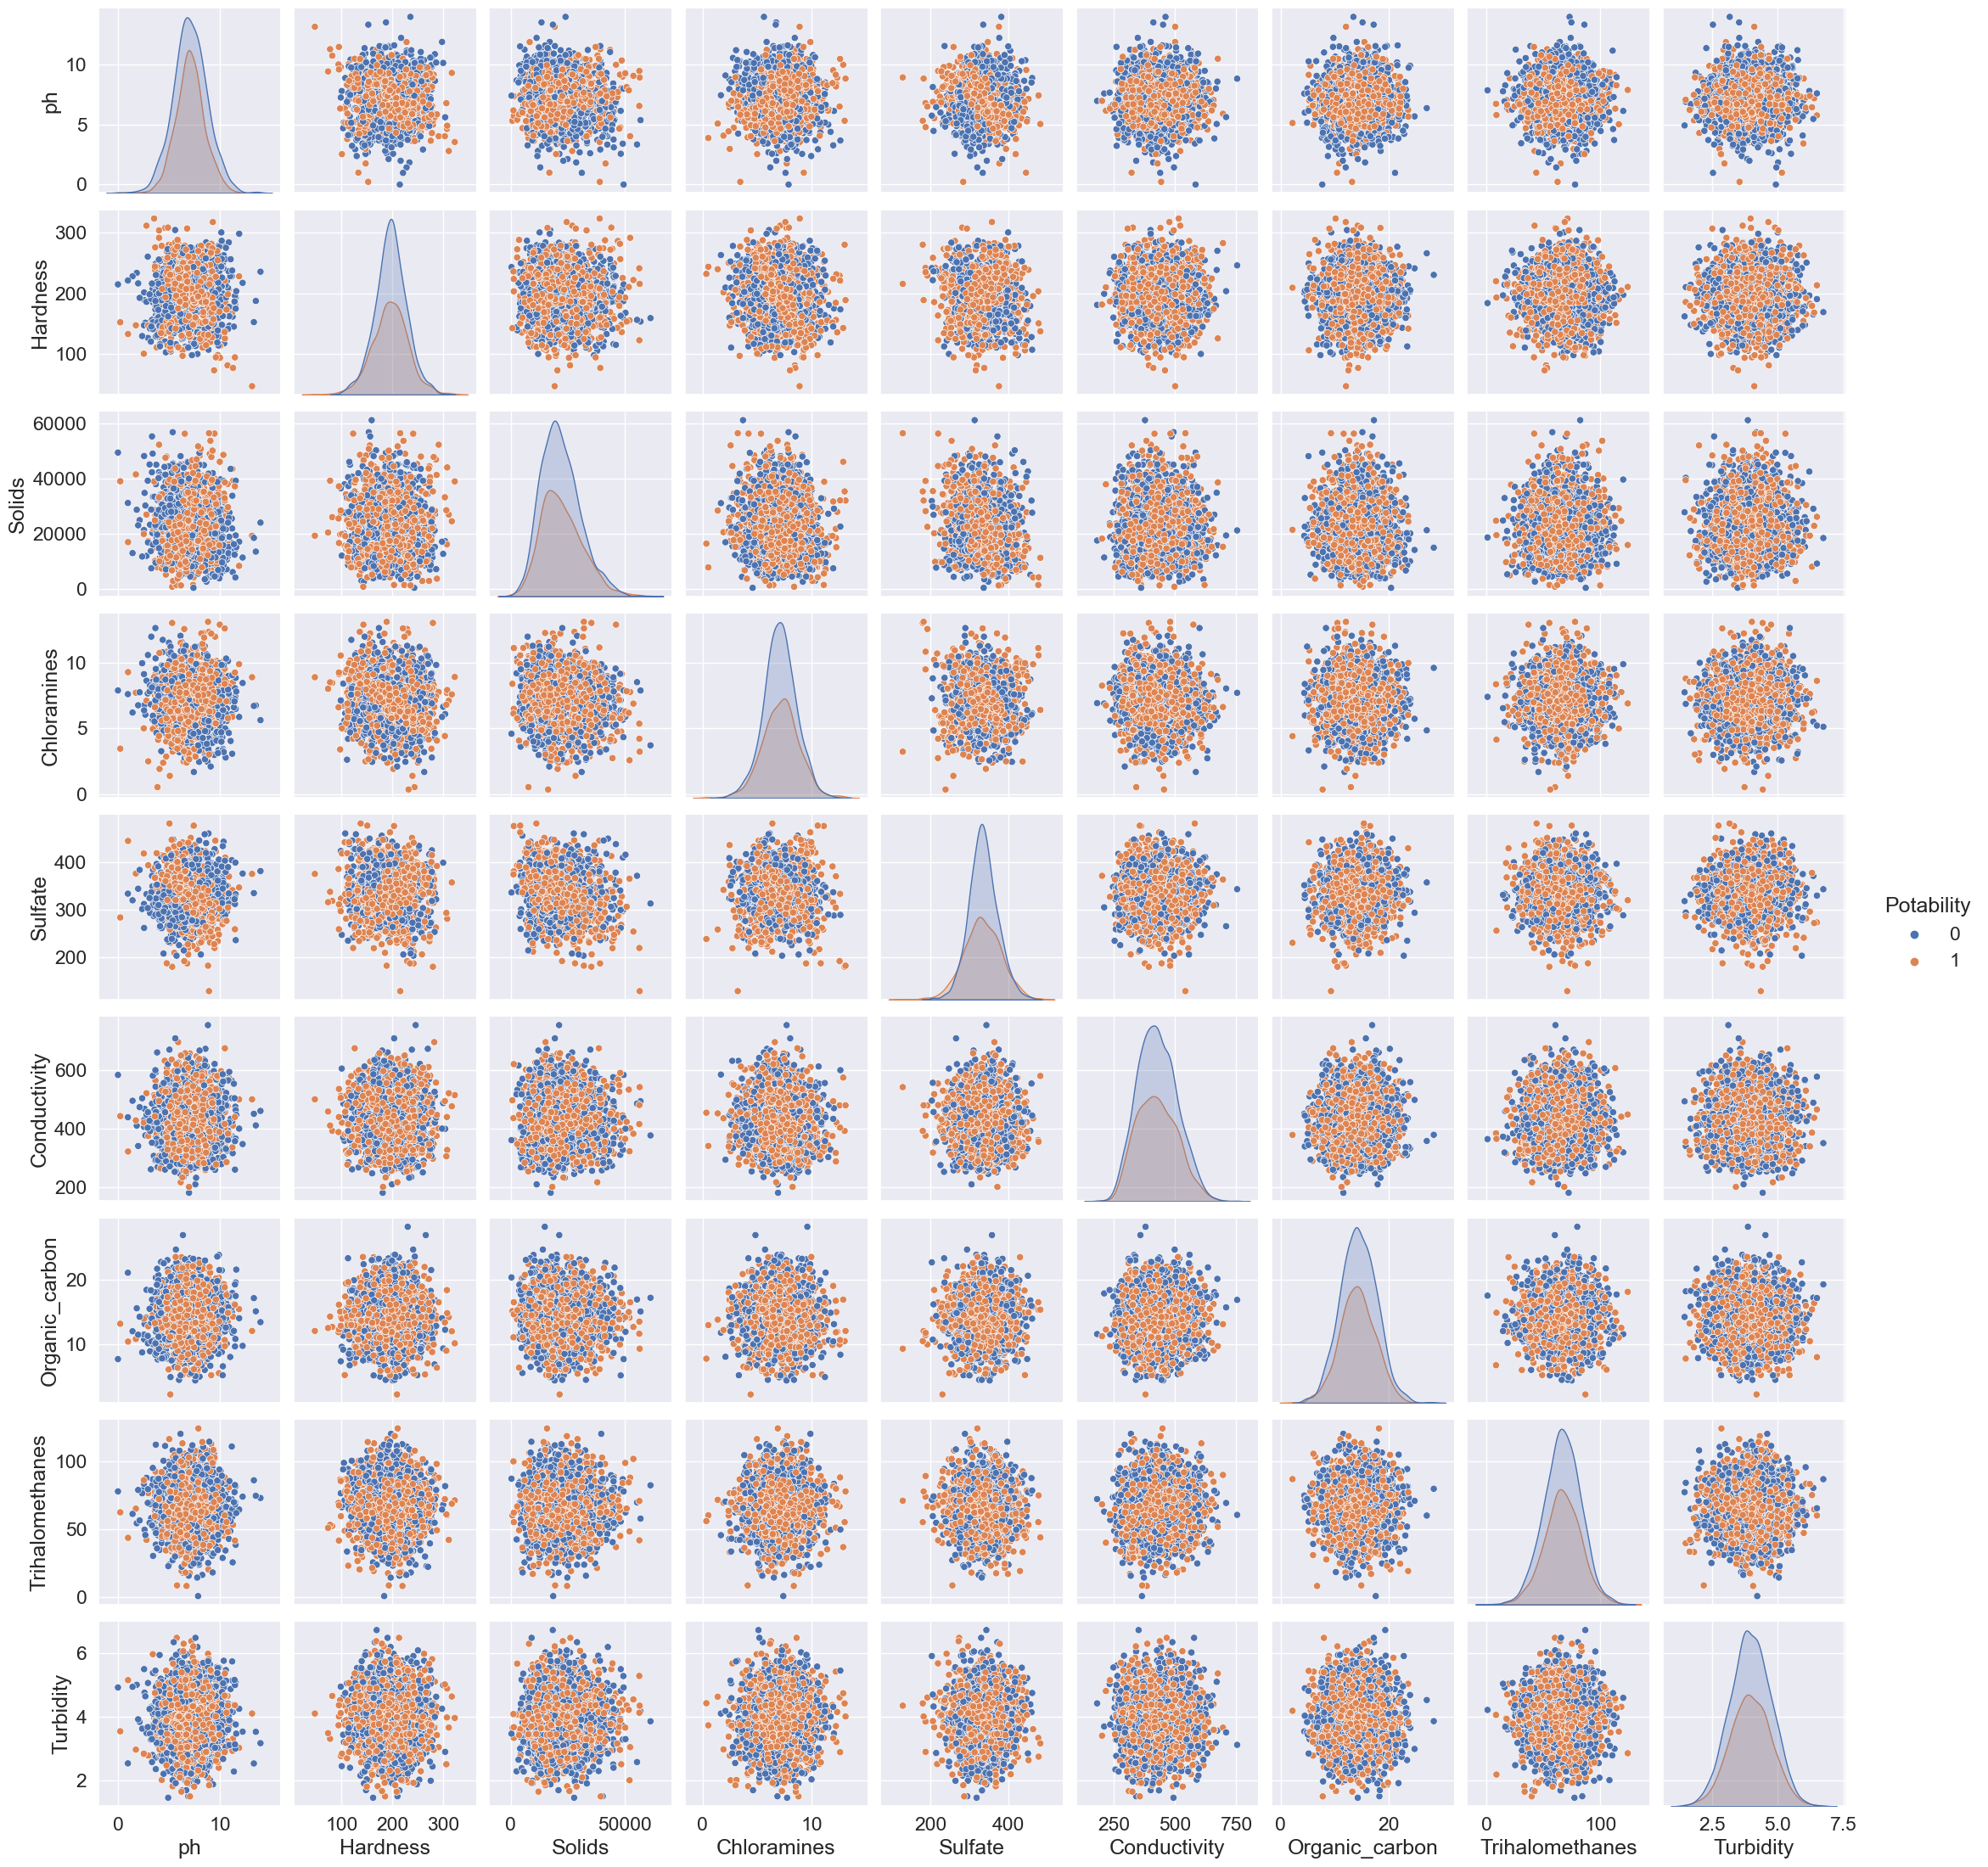

In [155]:
sns.pairplot(water_df, hue="Potability")

### Potability 컬럼을 제외한 컬럼이름만 리스트로 추출

In [156]:
col_names = list(water_df.columns)
col_names

['ph',
 'Hardness',
 'Solids',
 'Chloramines',
 'Sulfate',
 'Conductivity',
 'Organic_carbon',
 'Trihalomethanes',
 'Turbidity',
 'Potability']

### 데이터 분포, 관계 시각화
각 피처와 Potability와의 관계 확인

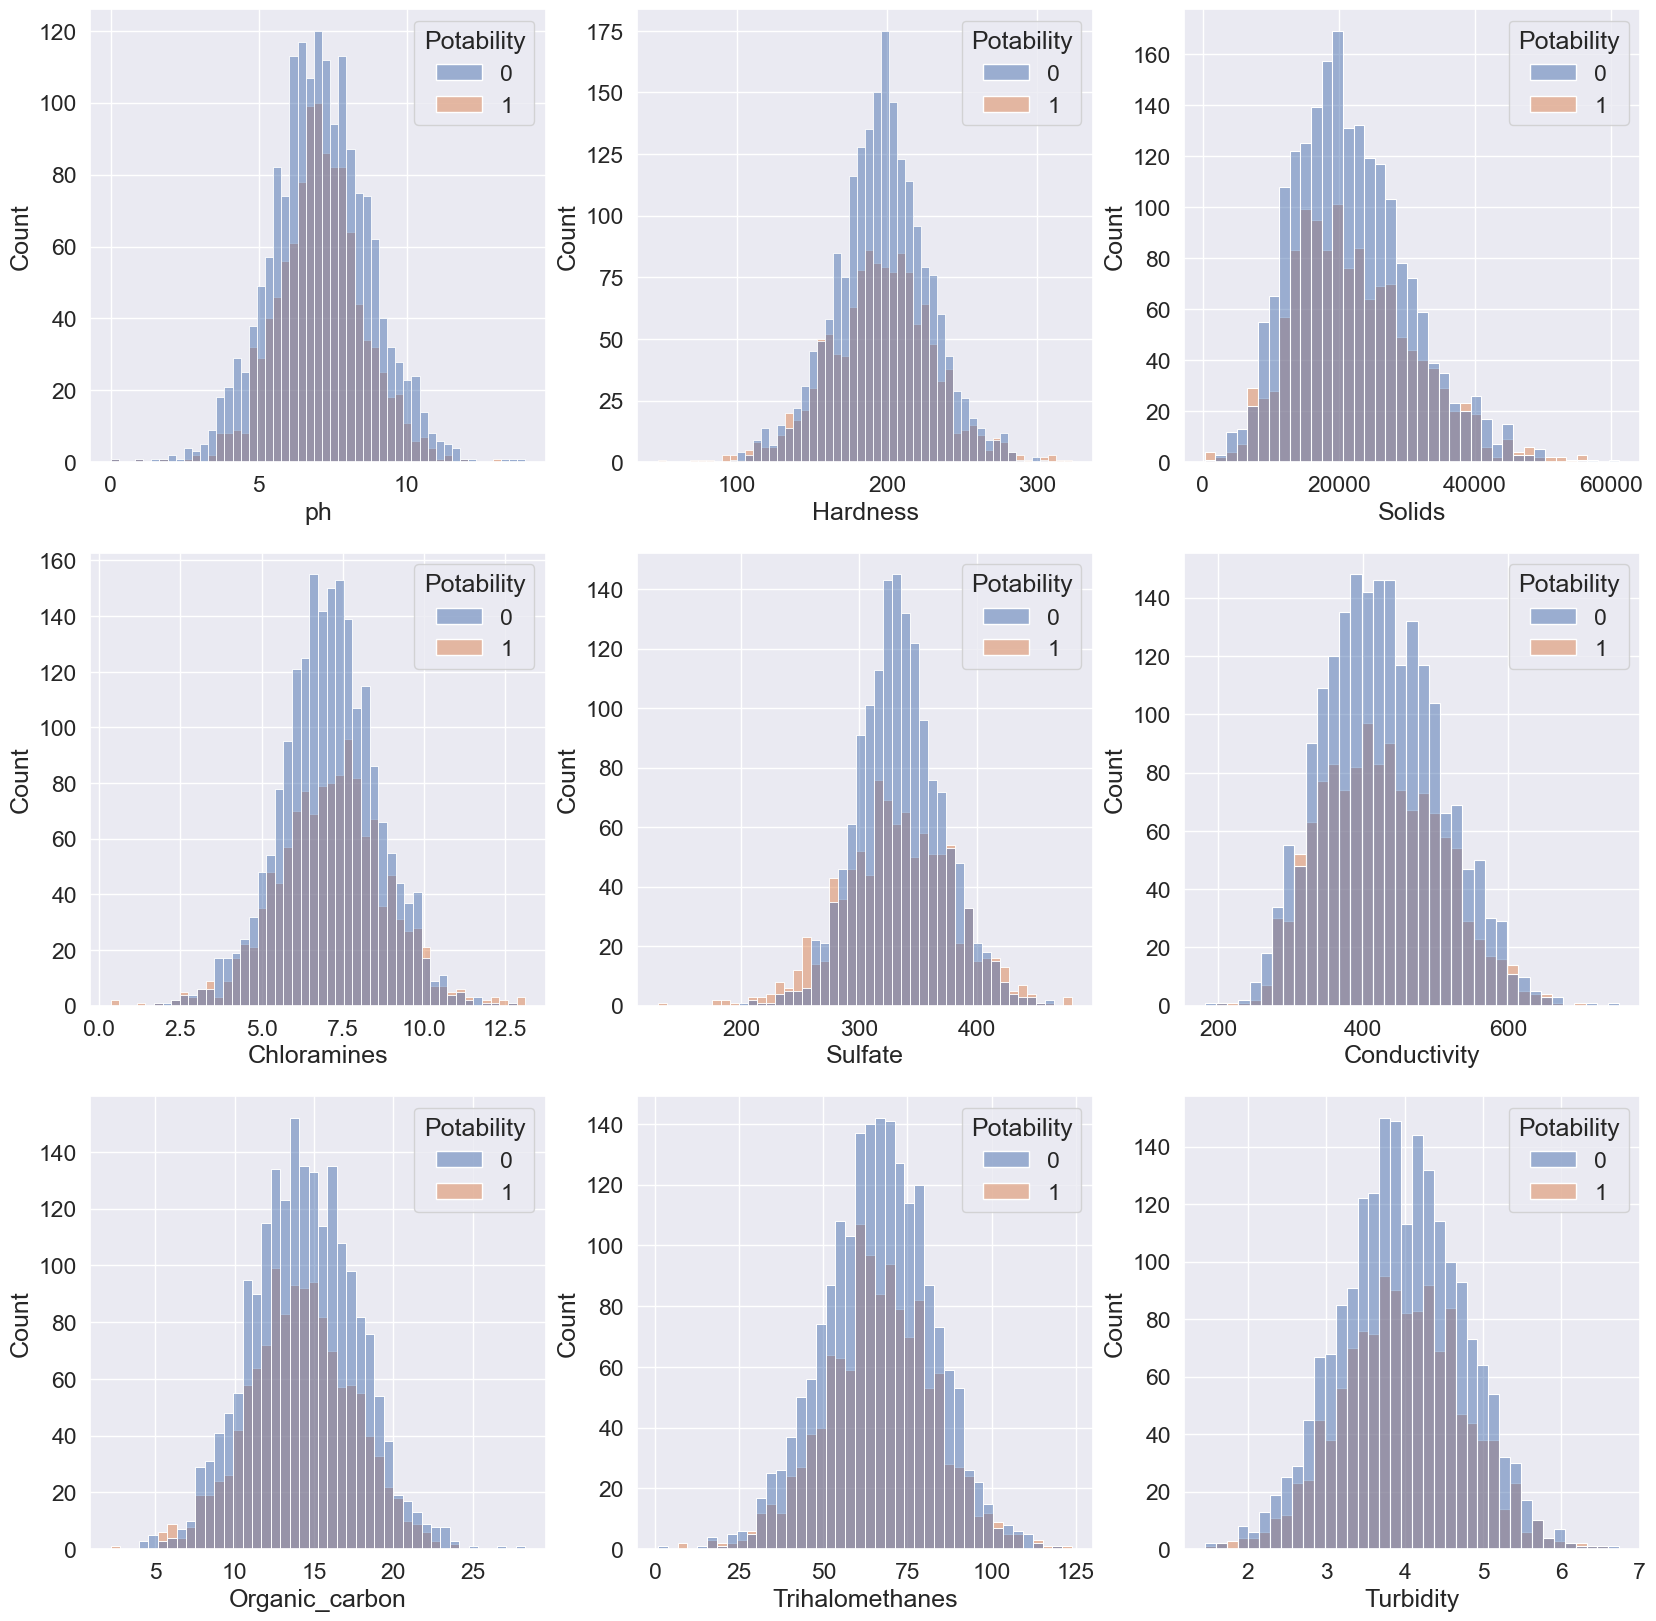

In [157]:
nrows, ncols = 3, 3
figure, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 20))
ax_list = axes.reshape(nrows * ncols)

# 그래프 그리기
for i in range(len(col_names)-1):
    # print(col_names[i])
    # print(ax_list[i])
    fig = sns.histplot(data=water_df, x=col_names[i], hue="Potability", ax=ax_list[i])


### 범위, 분포, 이상치 시각화

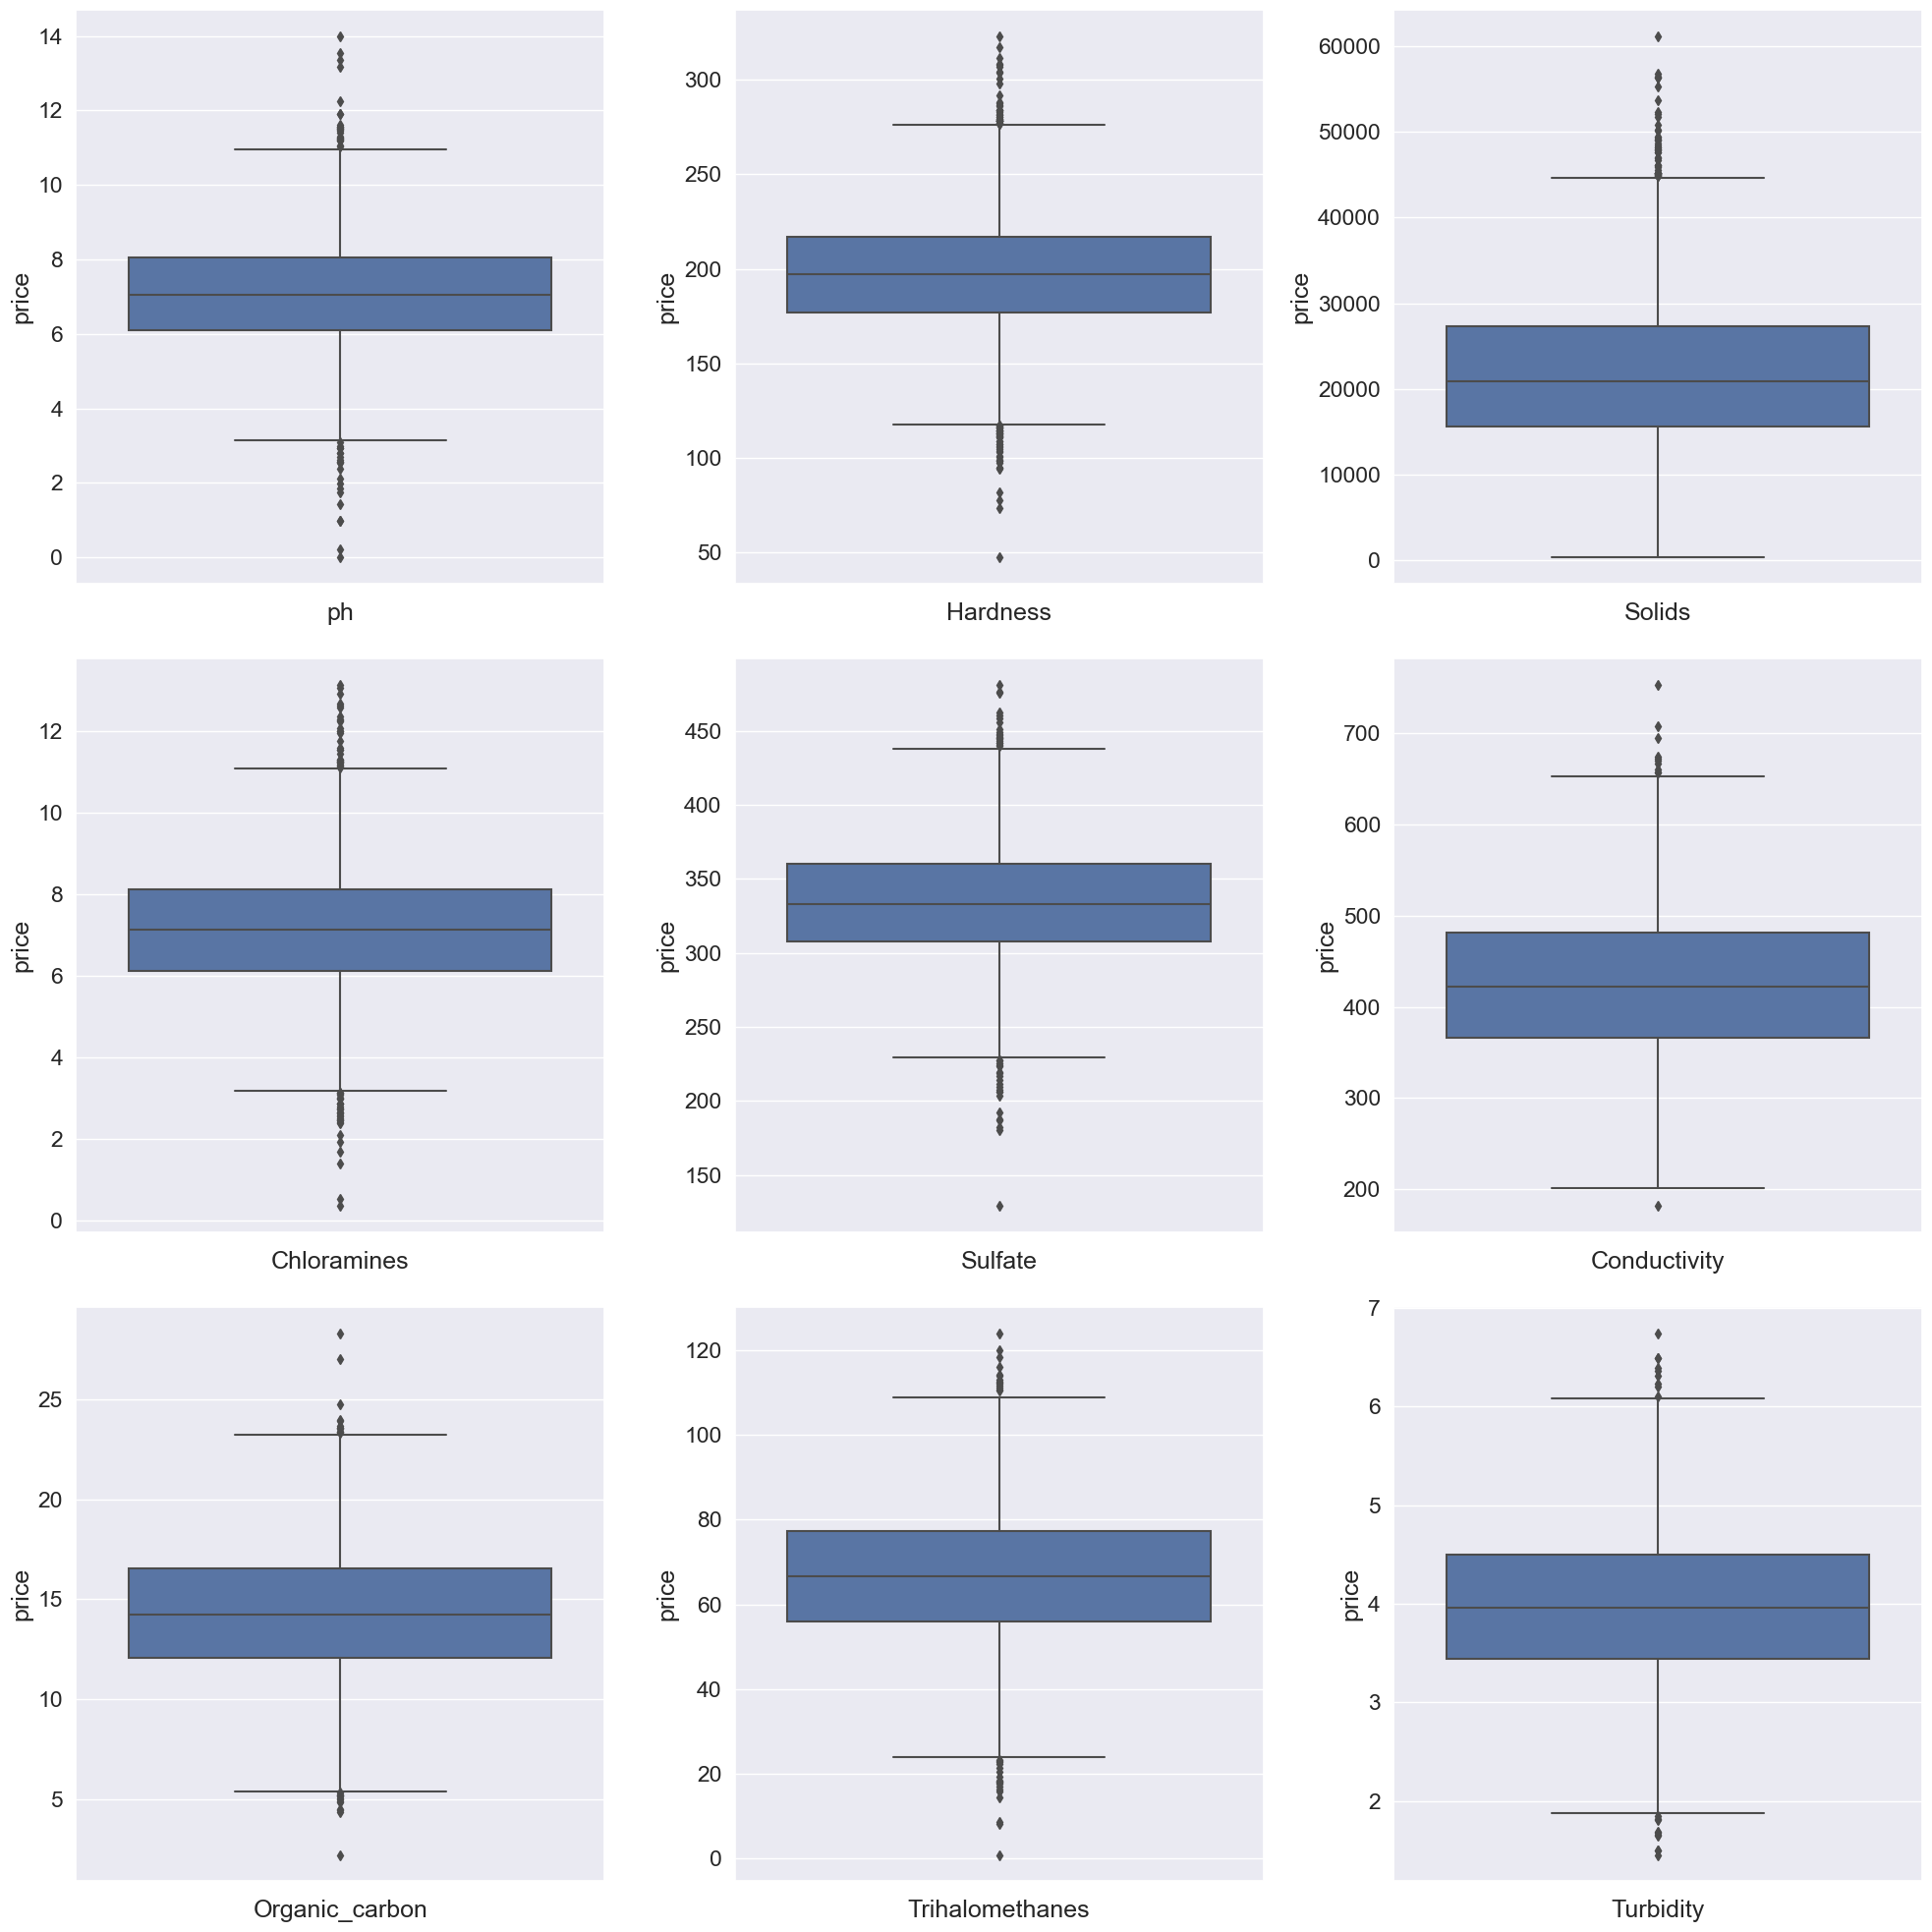

In [158]:
nrows, ncols = 3, 3
figure, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 20))
ax_list = axes.reshape(nrows * ncols)

# 그래프 그리기
for i in range(len(col_names)-1):
    # print(i)
    # print(df[num_cols_g])
    ax = sns.boxplot(data=water_df, y=col_names[i], ax=ax_list[i])
    ax.set(xlabel=col_names[i], ylabel="price")


plt.tight_layout()
plt.show()

### 각 피처들의 상관계수 시각화

In [159]:
corr_df = water_df[col_names]
corr_df

ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.885359       15.180013        56.329076   4.500656           0  
2       418.606213       16.868637        66.420093   3.055934           0  
3       363.266516       18.436524       100.341674   4.628771           0  
4       398.410813       11.558279        31.997993   4.075075           0  
...            ...             ...              ...        ...         ...  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225              NaN   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1  

[3276 rows x 10 columns]

In [160]:
corr = corr_df.corr()
corr

ph  Hardness    Solids  Chloramines   Sulfate  \
ph               1.000000  0.082096 -0.089288    -0.034350  0.018203   
Hardness         0.082096  1.000000 -0.046899    -0.030054 -0.106923   
Solids          -0.089288 -0.046899  1.000000    -0.070148 -0.171804   
Chloramines     -0.034350 -0.030054 -0.070148     1.000000  0.027244   
Sulfate          0.018203 -0.106923 -0.171804     0.027244  1.000000   
Conductivity     0.018614 -0.023915  0.013831    -0.020486 -0.016121   
Organic_carbon   0.043503  0.003610  0.010242    -0.012653  0.030831   
Trihalomethanes  0.003354 -0.013013 -0.009143     0.017084 -0.030274   
Turbidity       -0.039057 -0.014449  0.019546     0.002363 -0.011187   
Potability      -0.003556 -0.013837  0.033743     0.023779 -0.023577   

                 Conductivity  Organic_carbon  Trihalomethanes  Turbidity  \
ph                   0.018614        0.043503         0.003354  -0.039057   
Hardness            -0.023915        0.003610        -0.013013  -0.014449   
Solids               0.013831        0.010242        -0.009143   0.019546   
Chloramines         -0.020486       -0.012653         0.017084   0.002363   
Sulfate             -0.016121        0.030831        -0.030274  -0.011187   
Conductivity         1.000000        0.020966         0.001285   0.005798   
Organic_carbon       0.020966        1.000000        -0.013274  -0.027308   
Trihalomethanes      0.001285       -0.013274         1.000000  -0.022145   
Turbidity            0.005798       -0.027308        -0.022145   1.000000   
Potability          -0.008128       -0.030001         0.007130   0.001581   

                 Potability  
ph                -0.003556  
Hardness          -0.013837  
Solids             0.033743  
Chloramines        0.023779  
Sulfate           -0.023577  
Conductivity      -0.008128  
Organic_carbon    -0.030001  
Trihalomethanes    0.007130  
Turbidity          0.001581  
Potability         1.000000

Text(0.5, 1.0, 'Feature Correlation')

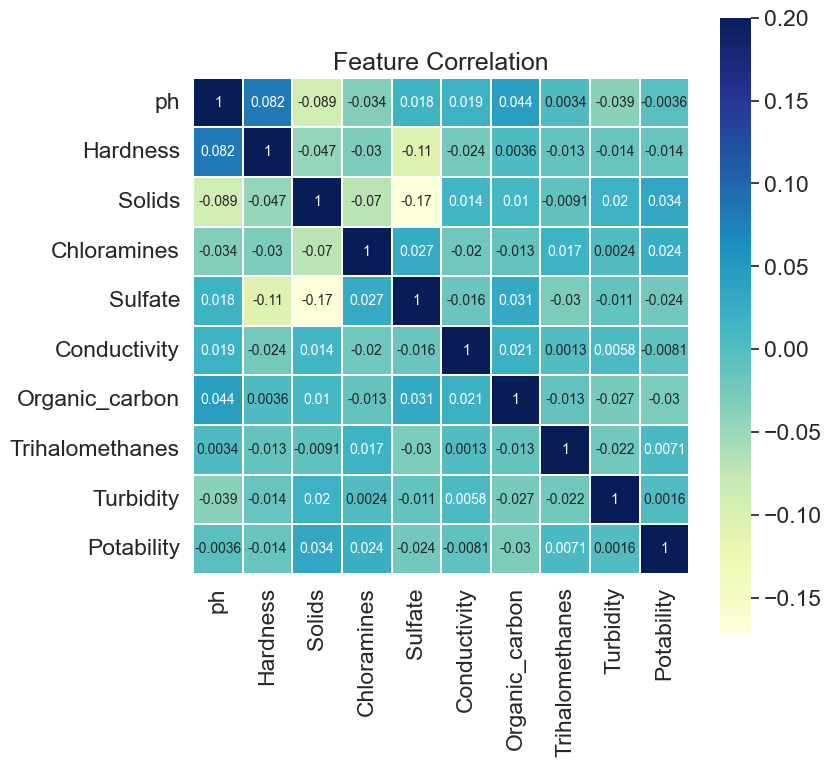

In [161]:
# 피처들간의 상관관계 살펴보기
plt.figure(figsize=(8, 8));


sns.set(font_scale=1.5)
sns.heatmap(
            corr,
            vmax=0.20,
            linewidths=0.01,
            square=True,
            annot=True,
            annot_kws={"size" : 10},
            cmap="YlGnBu"
           );

plt.title('Feature Correlation')

## 5. Data Preprocess(10점)

- 각 컬럼별로 결측 데이터의 갯수가 몇개인지 확인하기

In [162]:
water_df[col_names].isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

#### nan이 하나라도 있는 index 삭제

In [163]:
drop_row = water_df.dropna()

In [164]:
drop_row.shape

(2011, 10)

In [165]:
water_df.shape

(3276, 10)

In [166]:
drop_row.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2011 entries, 3 to 3271
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2011 non-null   float64
 1   Hardness         2011 non-null   float64
 2   Solids           2011 non-null   float64
 3   Chloramines      2011 non-null   float64
 4   Sulfate          2011 non-null   float64
 5   Conductivity     2011 non-null   float64
 6   Organic_carbon   2011 non-null   float64
 7   Trihalomethanes  2011 non-null   float64
 8   Turbidity        2011 non-null   float64
 9   Potability       2011 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 172.8 KB


## 6. Data Split(5점)

### 독립변수 X 와 종속변수 y로 나누기

In [167]:
X = drop_row.drop(["Potability"], axis=1)

In [168]:
X.shape

(2011, 9)

In [169]:
y = drop_row["Potability"]

In [170]:
y.shape

(2011,)

In [171]:
drop_row.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2011 entries, 3 to 3271
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2011 non-null   float64
 1   Hardness         2011 non-null   float64
 2   Solids           2011 non-null   float64
 3   Chloramines      2011 non-null   float64
 4   Sulfate          2011 non-null   float64
 5   Conductivity     2011 non-null   float64
 6   Organic_carbon   2011 non-null   float64
 7   Trihalomethanes  2011 non-null   float64
 8   Turbidity        2011 non-null   float64
 9   Potability       2011 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 172.8 KB


## 7. 피처 스케일링(15점)
- RobustScaler 피처 스케일 방법을 선택하고 스케일링하기

In [172]:
from sklearn.preprocessing import RobustScaler

In [173]:
rbs = RobustScaler()

In [174]:
X_scaled = rbs.fit_transform(X)[:5]

In [175]:
X_scaled

array([[ 0.65680483,  0.43282692,  0.09379373,  0.46448723,  0.47688378,
        -0.52025154,  0.90251278,  1.58391031,  0.61665097],
       [ 1.05179243, -0.40533748, -0.25542893, -0.30307355, -0.42741347,
        -0.21647915, -0.60622354, -1.61880978,  0.0997875 ],
       [-0.73511455, -0.22366198,  0.67564865,  0.20344828, -0.10742795,
        -1.23592751, -1.29904724, -0.54473938, -1.31477791],
       [ 1.6282047 ,  1.28173434,  0.67573759,  0.1874853 ,  1.1882697 ,
        -1.20840881, -0.11676465,  0.84639096, -1.20903279],
       [ 0.81933308,  0.15542278, -0.62777472, -1.30954823, -0.55944876,
         0.44213393, -0.42952973, -0.17544605,  0.40442813]])

In [176]:
x_cols = X.columns
x_cols

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity'],
      dtype='object')

In [177]:
X_scaled_df = pd.DataFrame(X_scaled, columns=x_cols)
X_scaled_df.head(3)

ph  Hardness    Solids  Chloramines   Sulfate  Conductivity  \
0  0.656805  0.432827  0.093794     0.464487  0.476884     -0.520252   
1  1.051792 -0.405337 -0.255429    -0.303074 -0.427413     -0.216479   
2 -0.735115 -0.223662  0.675649     0.203448 -0.107428     -1.235928   

   Organic_carbon  Trihalomethanes  Turbidity  
0        0.902513         1.583910   0.616651  
1       -0.606224        -1.618810   0.099787  
2       -1.299047        -0.544739  -1.314778

### 데이터를 Train, Test로 나누기

- y 값을 균일하게 분할
- test data size 0.2
- 실행할 때마다 분할이 재현되도록

In [178]:

train_X, test_X, train_y, test_y = train_test_split(
    X, y, test_size=0.2, random_state=300, stratify=y
)


In [179]:
print(train_X.shape, train_y.shape)

(1608, 9) (1608,)


In [180]:
print(test_X.shape, test_y.shape)

(403, 9) (403,)


## 8. KNN ML 모델 만들기 및 평가(10점)

In [181]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

knn.fit(train_X, train_y)

KNeighborsClassifier()

In [182]:
print("Acc: ", knn.score(test_X, test_y))

Acc:  0.5558312655086849


### Best Hyper Parameter 
다음이 파라메터에 대해서 KNN 모델의 베스트 파라미터를 찾아보세요. 

- n_neighbors : [2, 4, 6, 8, 10],
- p : [1, 2]
- cv : 3

In [183]:
from sklearn.model_selection import GridSearchCV

In [184]:
params = {
    "n_neighbors": [2, 4, 6, 8, 10],
    "p": [1, 2]
}

In [185]:
params

{'n_neighbors': [2, 4, 6, 8, 10], 'p': [1, 2]}

In [186]:
grid_cv = GridSearchCV(knn, param_grid=params, n_jobs=-1, cv=3)

In [187]:
grid_cv.fit(train_X, train_y)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [2, 4, 6, 8, 10], 'p': [1, 2]})

#### 모델 평가 

In [188]:
print(f"Best score of paramter search is: {grid_cv.best_score_:.4f}")

Best score of paramter search is: 0.6032


In [189]:
grid_cv.best_params_

{'n_neighbors': 10, 'p': 2}

In [190]:
print("Best parameter of best score is")
print(f"\t n_neighbors: {grid_cv.best_params_['n_neighbors']}")
print(f"\t p: {grid_cv.best_params_['p']}")

Best parameter of best score is
	 n_neighbors: 10
	 p: 2


#### 예측 및 평가

In [191]:
train_pred = grid_cv.best_estimator_.predict(train_X)
test_pred = grid_cv.best_estimator_.predict(test_X)

In [192]:
from sklearn.metrics import accuracy_score

train_acc = accuracy_score(train_y, train_pred)
test_acc = accuracy_score(test_y, test_pred)

In [193]:
print(f"train accuracy is {train_acc:.4f}")
print(f"test accuracy is {test_acc:.4f}")

train accuracy is 0.6704
test accuracy is 0.5484


In [194]:
# 레포트
print(classification_report(test_y, test_pred))

              precision    recall  f1-score   support

           0       0.59      0.81      0.68       240
           1       0.37      0.16      0.22       163

    accuracy                           0.55       403
   macro avg       0.48      0.49      0.45       403
weighted avg       0.50      0.55      0.50       403



## 9. xgboost 모델 만들기 및 평가(10점)

In [195]:
xgb_reg = xgb.XGBClassifier(n_estimators=100)

In [196]:
xgb_reg.fit(train_X, train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [197]:
train_acc = accuracy_score(train_y, train_pred)
test_acc = accuracy_score(test_y, test_pred)

print(f"train accuracy is {train_acc:.4f}")
print(f"test accuracy is {test_acc:.4f}")

train accuracy is 0.6704
test accuracy is 0.5484


In [198]:
pred = xgb_reg.predict(test_X)

In [199]:
# classification_report() 결과 출력
print(classification_report(test_y, pred))

              precision    recall  f1-score   support

           0       0.69      0.81      0.74       240
           1       0.62      0.45      0.52       163

    accuracy                           0.67       403
   macro avg       0.65      0.63      0.63       403
weighted avg       0.66      0.67      0.65       403



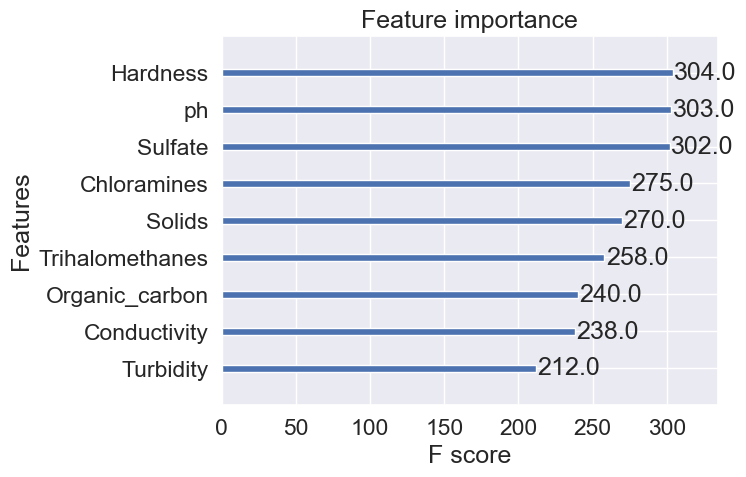

In [200]:
#xgboost의 강력한 기능 Feature Importance 확인
xgb.plot_importance(xgb_reg)
plt.show()

## 10. 최적의 파라미터 찾기(20점)
- xgboost 모델이 과적합인 것 같다. 
- GridSearchCV를 활용해 베스트 하이퍼 파라메터를 찾는 과정을 기술하고 모델을 평가해 보세요.

### GridSearchCV 객체 생성

In [201]:
grid_cv_xgb = GridSearchCV(xgb_reg, param_grid=params, n_jobs=-1, cv=3)

### GridSearchCV 통한 학습

In [202]:
grid_cv_xgb.fit(train_X, train_y)

[13:19:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "n_neighbors", "p" } are not used.



GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'n_neighbors': [2, 4, 6, 8, 10], 'p': [1, 2]})

### Best model 하이퍼 파라메터 확인

In [203]:
# best f1_macro 수치와 best parameter 확인
print(f"Best score of parameter search is : {grid_cv_xgb.best_score_:.4f}")
print(f"Best param : {grid_cv_xgb.best_params_}")

Best score of parameter search is : 0.6443
Best param : {'n_neighbors': 2, 'p': 1}


In [204]:
train_pred = grid_cv_xgb.best_estimator_.predict(train_X)

In [205]:
test_pred = grid_cv_xgb.best_estimator_.predict(test_X)

In [206]:
train_acc = accuracy_score(train_y, train_pred)
test_acc = accuracy_score(test_y, test_pred)

In [207]:
print(f"학습데이터 정확도: {train_acc}")
print(f"테스트 데이터 정확도: {test_acc}")

학습데이터 정확도: 1.0
테스트 데이터 정확도: 0.6650124069478908


In [208]:
print(classification_report(test_y, test_pred))

              precision    recall  f1-score   support

           0       0.69      0.81      0.74       240
           1       0.62      0.45      0.52       163

    accuracy                           0.67       403
   macro avg       0.65      0.63      0.63       403
weighted avg       0.66      0.67      0.65       403



In [209]:
# 튜닝된 파라미터 출력
print(grid_cv_xgb.best_params_)

{'n_neighbors': 2, 'p': 1}
